importing essntial libraies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Pitts-McCulloch neurons

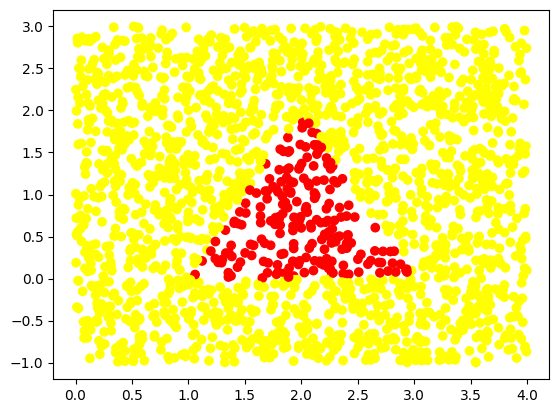

In [ ]:
class culloch_pits:
    def __init__(self, w, b, t):
        self.w = w
        self.b = b
        self.t = t
    def predict(self, x):
        if x  @ self.w + self.b < self.t:
            return 0
        else:
            return 1
n1 = culloch_pits(np.asarray([0, 1]), 0, 0) #should be 1
n2 = culloch_pits(np.asarray([2, -1]), -2, 0) #should be 1
n3 = culloch_pits(np.asarray([-2, -1]), 6, 0) #shoud be 1
output_neuron = culloch_pits(np.asarray([1, 1, 1]), -3, 0)
x = []
y = []
for i in range(2000):
    x.append(random.uniform(0, 4))
    y.append(random.uniform(-1, 3))
# Convert lists to NumPy arrays
x_array = np.array(x)
y_array = np.array(y)
x_new = x_array.reshape(-1, 1)
y_new = y_array.reshape(-1, 1)
tmp = np.concatenate((x_new, y_new), axis = 1)
flag = []
for i in range(2000):
    if output_neuron.predict(np.asarray([n1.predict(tmp[i]), n2.predict(tmp[i]), n3.predict(tmp[i])])):
        flag.append('red')
    else:
        flag.append('yellow')

plt.scatter(tmp[:,0], tmp[:,1], c = flag)

question 2

In [ ]:
!gdown 1R1aZ4mROb2E1fa9ZeDRT3LnbkUu3Bcro
data = pd.read_csv('teleCust1000t.csv')
data

Downloading...
From: https://drive.google.com/uc?id=1R1aZ4mROb2E1fa9ZeDRT3LnbkUu3Bcro
To: /content/teleCust1000t.csv
100% 37.0k/37.0k [00:00<00:00, 64.9MB/s]


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


<Axes: >

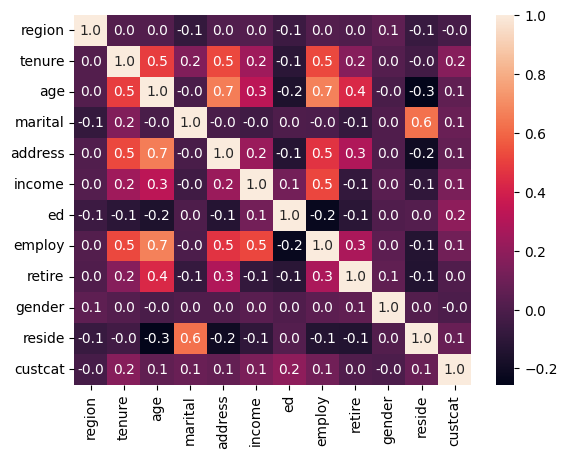

In [ ]:
correl = data.corr()
sns.heatmap(correl, annot = True, fmt = '.1f')


<Axes: xlabel='tenure', ylabel='Count'>

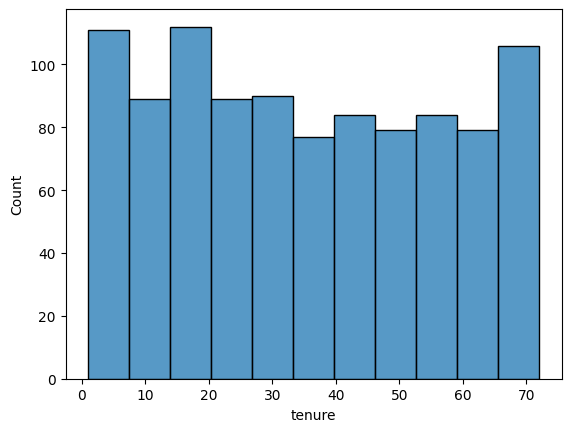

In [ ]:
sns.histplot(data['tenure'])

In [ ]:
scaler = preprocessing.MinMaxScaler().fit(data)
new_data = scaler.transform(data)
new_data = pd.DataFrame(new_data)
print(new_data.head())
X = new_data.to_numpy()
#making features and target for softmax
Y = X[:,-1]
X = X[:,0:-1]
tmp = np.zeros((1000, 4))
for i in range(1000):
    if round(Y[i], 1) == 0:
        tmp[i,0] = 1
    if round(Y[i], 1) == 0.3:
        tmp[i,1] = 1
    if round(Y[i], 1) == 0.7:
        tmp[i,2] = 1
    if round(Y[i], 1) == 1:
        tmp[i,3] = 1

Y = tmp
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.25, random_state=13)


    0         1         2    3         4         5     6         7    8    9   \
0  0.5  0.169014  0.440678  1.0  0.163636  0.033153  0.75  0.106383  0.0  0.0   
1  1.0  0.140845  0.254237  1.0  0.127273  0.076552  1.00  0.106383  0.0  0.0   
2  1.0  0.943662  0.576271  1.0  0.436364  0.064497  0.00  0.617021  0.0  1.0   
3  0.5  0.450704  0.254237  0.0  0.218182  0.014467  0.25  0.000000  0.0  1.0   
4  0.5  0.309859  0.203390  1.0  0.163636  0.012658  0.00  0.042553  0.0  0.0   

         10        11  
0  0.142857  0.000000  
1  0.714286  1.000000  
2  0.142857  0.666667  
3  0.000000  0.000000  
4  0.428571  0.666667  


In [ ]:
# Define the model
model = Sequential(
    [
        Dense(20, activation='linear', input_shape=(x_train.shape[1],)),  # input layer with input_shape defined
        Dense(90, activation='linear'),
        Dense(120, activation='linear'),
        Dense(4, activation='softmax')    # output layer
    ]
)
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']  # Track accuracy as a metric
)

# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=400)

# Evaluate the model to get the accuracy
loss, accuracy = model.evaluate(x_train, y_train)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2442 - loss: 1.4519  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2542 - loss: 1.4321
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2408 - loss: 1.4257 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2167 - loss: 1.4230
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2217 - loss: 1.4183 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2283 - loss: 1.4120 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2567 - loss: 1.4034 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2583 - loss: 1.3985 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2425 - loss: 1.3989 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2450 - loss: 1.3988 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2567 - loss: 1.3924
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2550 - loss: 1.3917


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


<Figure size 1000x700 with 0 Axes>

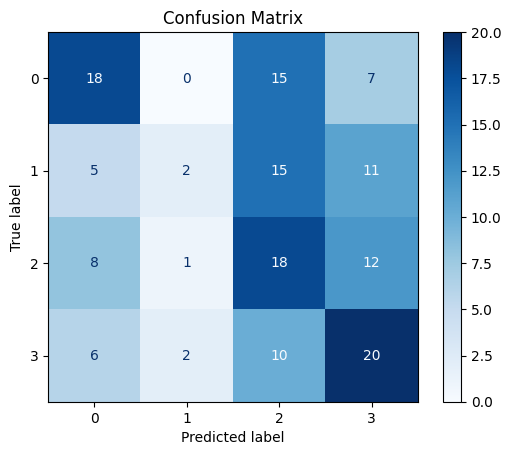

In [ ]:
# Assuming your model is already trained and you have x_test and y_test available

# Predicting the classes
y_pred = model.predict(x_test)
# Getting the predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is one-hot encoded, convert it to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(4)) # Assuming 4 classes
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

another model

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2367 - loss: 1.4610 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2258 - loss: 1.4525 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2433 - loss: 1.4382 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2450 - loss: 1.4242 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2392 - loss: 1.4249 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2500 - loss: 1.4144 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2500 - loss: 1.4096
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2650 - loss: 1.4003 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2700 - loss: 1.3989 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2592 - loss: 1.3995 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2692 - loss: 1.3921 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2733 - loss: 1.3898 


<Figure size 1000x700 with 0 Axes>

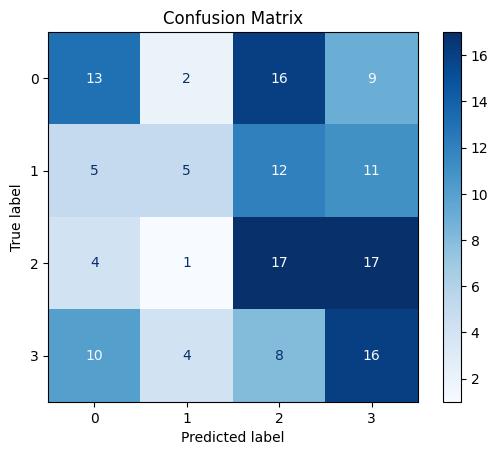

In [ ]:
# Define the model
model = Sequential(
    [
        Dense(20, activation='linear', input_shape=(x_train.shape[1],)),  # input layer with input_shape defined
        Dense(70, activation='linear'),
        Dense(100, activation='linear'),
        Dense(4, activation='softmax')    # output layer
    ]
)
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']  # Track accuracy as a metric
)

# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=400)

# Evaluate the model to get the accuracy
loss, accuracy = model.evaluate(x_train, y_train)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')
# Assuming your model is already trained and you have x_test and y_test available

# Predicting the classes
y_pred = model.predict(x_test)
# Getting the predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is one-hot encoded, convert it to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(4)) # Assuming 4 classes
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

add batch normalization

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2233 - loss: 2.0162  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2592 - loss: 1.7205 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2825 - loss: 1.5282 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3217 - loss: 1.4236 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3333 - loss: 1.3751 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3608 - loss: 1.3341 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3650 - loss: 1.3009 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3858 - loss: 1.2922 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3700 - loss: 1.2876 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3925 - loss: 1.2614 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4050 - loss: 1.2569 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4042 - lo

<Figure size 1000x700 with 0 Axes>

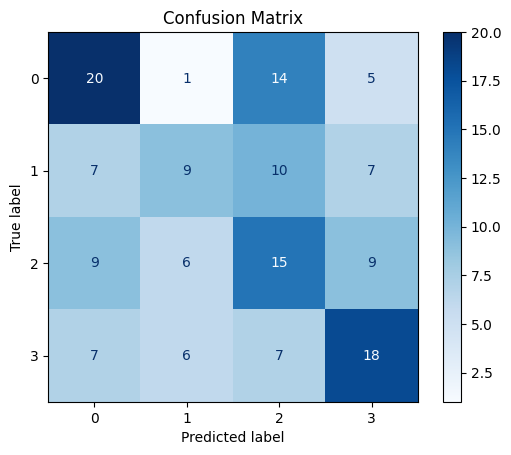

In [ ]:
# Define the model
model = Sequential([
    Dense(20, activation='linear', input_shape=(x_train.shape[1],)),  # Input layer with `input_shape` defined
    BatchNormalization(),  # Add BatchNormalization after the first Dense layer
    Dense(70, activation='linear'),
    BatchNormalization(),  # Add BatchNormalization after the second Dense layer
    Dense(100, activation='linear'),
    BatchNormalization(),  # Add BatchNormalization after the third Dense layer
    Dense(4, activation='softmax')    # Output layer
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']  # Track accuracy as a metric
)

# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=400)

# Evaluate the model to get the accuracy
loss, accuracy = model.evaluate(x_train, y_train)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

# Assuming your model is already trained and you have x_test and y_test available

# Predicting the classes
y_pred = model.predict(x_test)
# Getting the predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is one-hot encoded, convert it to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(4))  # Assuming 4 classes
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2225 - loss: 2.1550
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2867 - loss: 2.0018
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2375 - loss: 1.9894 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2458 - loss: 1.9540
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2875 - loss: 1.8863
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2492 - loss: 1.8923 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2742 - loss: 1.8536 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2708 - loss: 1.8615
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2817 - loss: 1.8593
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2575 - loss: 1.8109
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2700 - loss: 1.7648
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2683 - loss: 1.7738
E

Accuracy: 0.42
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


<Figure size 1000x700 with 0 Axes>

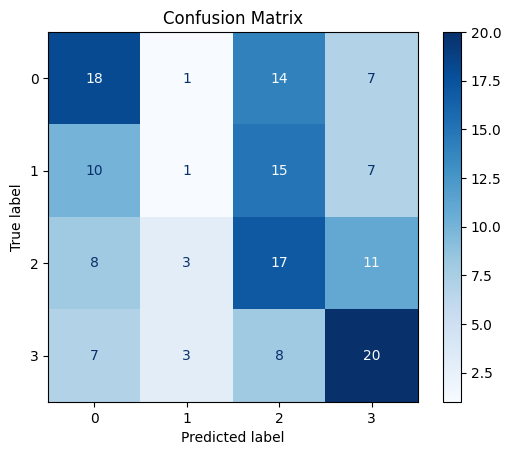

In [ ]:
# Define the model
model = Sequential([
    Dense(20, activation='linear', input_shape=(x_train.shape[1],)),  # Input layer with `input_shape` defined
    BatchNormalization(),  # Add BatchNormalization after the first Dense layer
    Dropout(0.3),  # Add Dropout after BatchNormalization (30% dropout)
    Dense(70, activation='linear'),
    BatchNormalization(),  # Add BatchNormalization after the second Dense layer
    Dropout(0.3),  # Add Dropout after BatchNormalization (30% dropout)
    Dense(100, activation='linear'),
    BatchNormalization(),  # Add BatchNormalization after the third Dense layer
    Dropout(0.3),  # Add Dropout after BatchNormalization (30% dropout)
    Dense(4, activation='softmax')  # Output layer
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']  # Track accuracy as a metric
)

# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=400)

# Evaluate the model to get the accuracy
loss, accuracy = model.evaluate(x_train, y_train)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

# Assuming your model is already trained and you have x_test and y_test available

# Predicting the classes
y_pred = model.predict(x_test)
# Getting the predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is one-hot encoded, convert it to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(4))  # Assuming 4 classes
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.2417 - loss: 1.9801
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3042 - loss: 1.6900 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3375 - loss: 1.5174 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3533 - loss: 1.4157 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3692 - loss: 1.3515
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3908 - loss: 1.3188
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3917 - loss: 1.2998
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4067 - loss: 1.2790 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3942 - loss: 1.2850 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4083 - loss: 1.2812 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4075 - loss: 1.2649
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.405

<Figure size 1000x700 with 0 Axes>

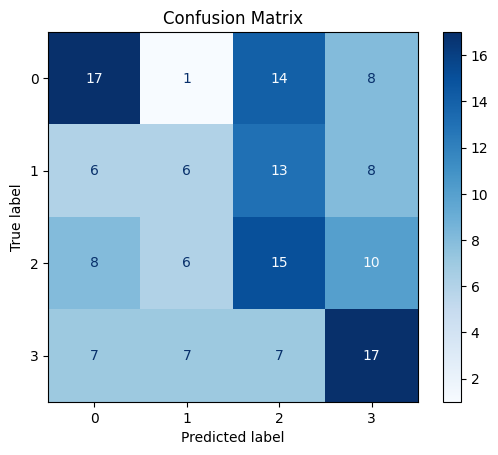

In [ ]:
# Define the model
model = Sequential([
    Dense(20, activation='linear', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.0001)),  # Input layer with L2 regularization
    BatchNormalization(),  # Add BatchNormalization after the first Dense layer
    Dense(70, activation='linear', kernel_regularizer=l2(0.0001)),  # L2 regularization for second Dense layer
    BatchNormalization(),  # Add BatchNormalization after the second Dense layer
    Dense(100, activation='linear', kernel_regularizer=l2(0.0001)),  # L2 regularization for third Dense layer
    BatchNormalization(),  # Add BatchNormalization after the third Dense layer
    Dense(4, activation='softmax')  # Output layer (no regularization for output layer)
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']  # Track accuracy as a metric
)

# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=400)

# Evaluate the model to get the accuracy
loss, accuracy = model.evaluate(x_train, y_train)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

# Assuming your model is already trained and you have x_test and y_test available

# Predicting the classes
y_pred = model.predict(x_test)
# Getting the predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is one-hot encoded, convert it to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(4))  # Assuming 4 classes
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2883 - loss: 1.6740
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3592 - loss: 1.3619
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3833 - loss: 1.3100 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4075 - loss: 1.2940
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4033 - loss: 1.2911
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3917 - loss: 1.2618
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3900 - loss: 1.2436 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4050 - loss: 1.2402
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4158 - loss: 1.2382
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4233 - loss: 1.2291
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4108 - loss: 1.2427
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4225 - lo

<Figure size 1000x700 with 0 Axes>

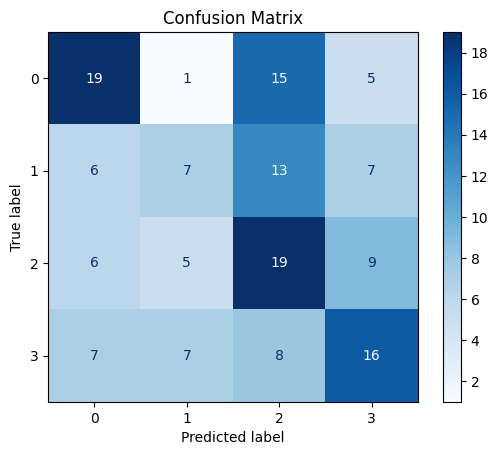

In [ ]:
# Define the model
model = Sequential([
    Dense(20, activation='linear', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dense(70, activation='linear'),
    BatchNormalization(),
    Dense(100, activation='linear'),
    BatchNormalization(),
    Dense(4, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=400)

# Evaluate the model to get the accuracy
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Accuracy: {accuracy:.2f}')
# Assuming your model is already trained and you have x_test and y_test available

# Predicting the classes
y_pred = model.predict(x_test)
# Getting the predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is one-hot encoded, convert it to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(4))  # Assuming 4 classes
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3025 - loss: 1.6638
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3767 - loss: 1.3081
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3917 - loss: 1.2558 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4142 - loss: 1.2517
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4067 - loss: 1.2519
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3900 - loss: 1.2493
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4025 - loss: 1.2334
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4150 - loss: 1.2322 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4283 - loss: 1.2390
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4125 - loss: 1.2307 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4283 - loss: 1.2311
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4300 - lo

<Figure size 1000x700 with 0 Axes>

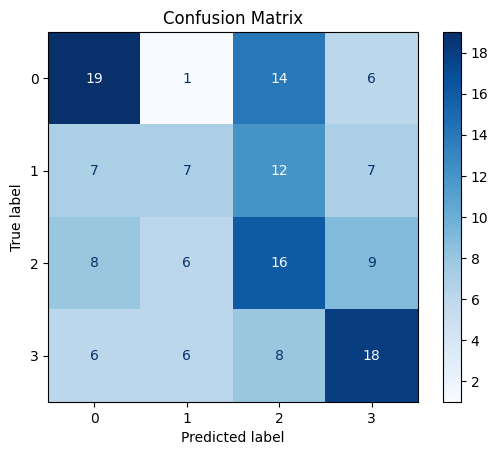

In [ ]:
# Define the model
model = Sequential([
    Dense(20, activation='linear', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dense(70, activation='linear'),
    BatchNormalization(),
    Dense(100, activation='linear'),
    BatchNormalization(),
    Dense(4, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy']
)
# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=400)

# Evaluate the model to get the accuracy
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Accuracy: {accuracy:.2f}')
# Assuming your model is already trained and you have x_test and y_test available

# Predicting the classes
y_pred = model.predict(x_test)
# Getting the predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is one-hot encoded, convert it to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(4))  # Assuming 4 classes
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2817 - loss: 2.0795
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2817 - loss: 2.0175 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2842 - loss: 1.9133
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2817 - loss: 1.8550
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2925 - loss: 1.7610 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2850 - loss: 1.7187 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2933 - loss: 1.6633 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3000 - loss: 1.6073
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3017 - loss: 1.5631
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3067 - loss: 1.5477 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3075 - loss: 1.5330 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3025 - loss: 1.5243
E

<Figure size 1000x700 with 0 Axes>

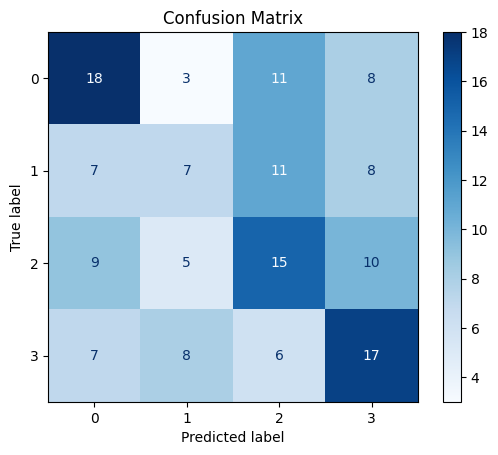

In [ ]:
# Define the model
model = Sequential([
    Dense(20, activation='linear', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dense(70, activation='linear'),
    BatchNormalization(),
    Dense(100, activation='linear'),
    BatchNormalization(),
    Dense(4, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adagrad(),
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=200, batch_size=400)

# Evaluate the model to get the accuracy
loss, accuracy = model.evaluate(x_train, y_train)
print(f'Accuracy: {accuracy:.2f}')
# Assuming your model is already trained and you have x_test and y_test available

# Predicting the classes
y_pred = model.predict(x_test)
# Getting the predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# If your y_test is one-hot encoded, convert it to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(4))  # Assuming 4 classes
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming x_test and y_test are your test feature and target datasets
# Randomly select 10 indices from the test dataset
random_indices = np.random.choice(x_test.shape[0], size=10, replace=False)

# Get the corresponding test data and target values
sample_x = x_test[random_indices]
sample_y = y_test[random_indices]

# Use the trained model to predict classes for the sampled data
predictions = model.predict(sample_x)

# Get predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert the one-hot encoded y_test sample to class labels
true_classes = np.argmax(sample_y, axis=1)

# Display the results
for i in range(10):
    print(f"Sample {i + 1}:")
    print(f"True class: {true_classes[i]}, Predicted class: {predicted_classes[i]}")
    print("-" * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Sample 1:
True class: 3, Predicted class: 1
------------------------------
Sample 2:
True class: 0, Predicted class: 0
------------------------------
Sample 3:
True class: 0, Predicted class: 0
------------------------------
Sample 4:
True class: 1, Predicted class: 1
------------------------------
Sample 5:
True class: 1, Predicted class: 1
------------------------------
Sample 6:
True class: 3, Predicted class: 3
------------------------------
Sample 7:
True class: 1, Predicted class: 2
------------------------------
Sample 8:
True class: 0, Predicted class: 0
------------------------------
Sample 9:
True class: 0, Predicted class: 2
------------------------------
Sample 10:
True class: 1, Predicted class: 3
------------------------------


question 3

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 22.4MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [ ]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

In [ ]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 10000000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


In [ ]:
from google.colab import files

for i in range(1, 6):  # For noisy1.jpg to noisy5.jpg
    files.download(f'/content/noisy{i}.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from PIL import Image, ImageDraw
import random

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

In [ ]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 10000000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
generateNoisyImages()


Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


In [ ]:
from google.colab import files

for i in range(1, 6):  # For noisy1.jpg to noisy5.jpg
    files.download(f'/content/noisy{i}.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

rewrite making piture in binary way

In [ ]:
from PIL import Image
import numpy as np

def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file and convert to RGB
    image = Image.open(path).convert('RGB')

    # Convert image to a numpy array
    pixels = np.array(image)

    # Calculate the total intensity for each pixel
    total_intensity = np.sum(pixels, axis=2)

    # Define the threshold for binary conversion
    threshold = ((255 + 100) // 2) * 3  # Adjusted threshold based on factor

    # Create the binary representation
    binary_representation = np.where(total_intensity > threshold, -1, 1)

    # Return the binary representation as a flattened list
    return binary_representation.flatten().tolist()

In [ ]:
from PIL import Image
import numpy as np
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image and convert to RGB
    image = Image.open(input_path).convert('RGB')
    pixels = np.array(image)  # Convert image to a NumPy array

    # Define noise level
    noise_factor = 10000  # Adjust the noise factor as needed

    # Generate random noise and add it to the pixel values
    noise = np.random.randint(-noise_factor, noise_factor + 1, pixels.shape).astype(np.int32)
    noisy_pixels = np.clip(pixels + noise, 0, 255).astype(np.uint8)  # Ensure pixel values are valid

    # Save the noisy image
    noisy_image = Image.fromarray(noisy_pixels)
    noisy_image.save(output_path, "JPEG")

# Generate noisy images and save them
generateNoisyImages()

Noisy image for /content/1.jpg generated and saved as /content/noisy1.jpg
Noisy image for /content/2.jpg generated and saved as /content/noisy2.jpg
Noisy image for /content/3.jpg generated and saved as /content/noisy3.jpg
Noisy image for /content/4.jpg generated and saved as /content/noisy4.jpg
Noisy image for /content/5.jpg generated and saved as /content/noisy5.jpg


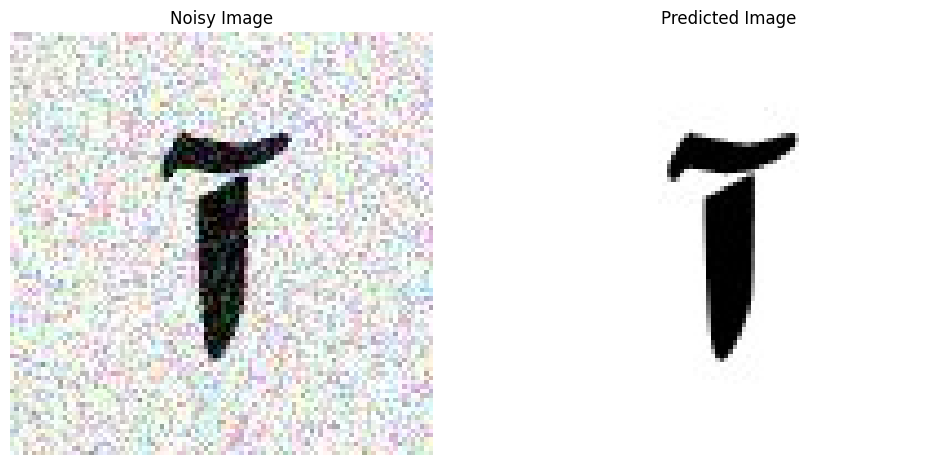

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def hamming_distance(image1, image2):
    """Calculate the Hamming distance between two binary images."""
    return np.sum(image1 != image2)

def hamming_neural_network(noisy_image, original_images):
    """Predict the original image from a noisy image using Hamming distance."""
    min_distance = float('inf')
    predicted_image = None

    for original in original_images:
        distance = hamming_distance(noisy_image.flatten(), original.flatten())  # Flatten for comparison
        if distance < min_distance:
            min_distance = distance
            predicted_image = original

    return predicted_image

def plot_images(noisy_image, predicted_image):
    """Plot the noisy and predicted images side by side."""
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Noisy Image")
    plt.imshow(noisy_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Predicted Image")
    plt.imshow(predicted_image)
    plt.axis('off')

    plt.show()

# Step 1: Set paths for original images and generated noisy images
original_image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

# Assuming noisy images have been saved as follows
noisy_image_paths = [
    "/content/noisy1.jpg",
    "/content/noisy2.jpg",
    "/content/noisy3.jpg",
    "/content/noisy4.jpg",
    "/content/noisy5.jpg"
]

# Load original images for prediction
original_images = [np.array(Image.open(path).convert('RGB')) for path in original_image_paths]

# Load noisy images for testing
noisy_images = [np.array(Image.open(path).convert('RGB')) for path in noisy_image_paths]

# Step 2: Use the first noisy image for prediction
noisy_image = noisy_images[0]
predicted_image = hamming_neural_network(noisy_image, original_images)

# Step 3: Plot the noisy image and its predicted original image
plot_images(noisy_image, predicted_image)

hopfield neural network

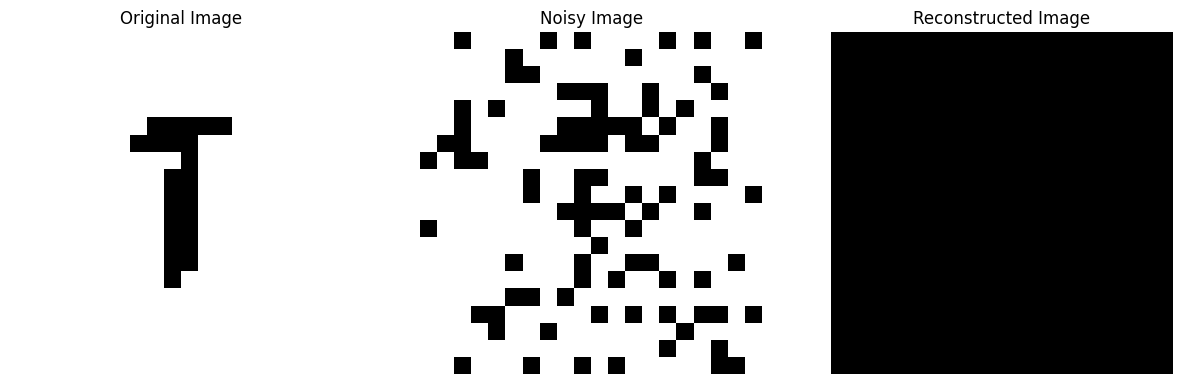

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Class implementation for the Hopfield Network
class HopfieldNetwork:
    def __init__(self, n_units):
        self.weights = np.zeros((n_units, n_units))

    def train(self, patterns):
        """Train the Hopfield network with binary patterns."""
        for pattern in patterns:
            # Make sure the pattern is bipolar: -1 for 0, +1 for 1
            bipolar_pattern = np.where(pattern == 0, -1, 1)
            self.weights += np.outer(bipolar_pattern, bipolar_pattern)
        # Set the diagonal to zero to avoid self-connections
        np.fill_diagonal(self.weights, 0)

    def predict(self, input_pattern, max_iterations=5):
        """Predict the output based on an input pattern."""
        current_pattern = np.where(input_pattern == 0, -1, 1)  # Convert to bipolar
        for _ in range(max_iterations):
            for i in range(len(current_pattern)):
                # Calculate the net input
                net_input = np.dot(self.weights[i], current_pattern)
                # Update the state based on the net input
                current_pattern[i] = 1 if net_input > 0 else 0
        return np.where(current_pattern == -1, 0, 1)  # Convert back to binary

def load_and_binarize_images(image_paths, size=(20, 20)):
    """Load and binarize images to a specified size."""
    images = []
    for path in image_paths:
        img = Image.open(path).convert('L').resize(size)  # Convert to grayscale and resize
        img_array = np.array(img)
        # Binarize the image: 0 for Dark, 1 for Light
        binarized_image = np.where(img_array > 128, 1, 0)  # Threshold at 128
        images.append(binarized_image.flatten())  # Flatten for the Hopfield network
    return images

def add_noise(image, noise_level=0.1):
    """Add noise to a binary image."""
    noisy_image = image.copy()
    num_flips = int(noise_level * noisy_image.size)  # Total pixels to flip
    indices = np.random.choice(np.arange(noisy_image.size), num_flips, replace=False)
    noisy_image.ravel()[indices] = 1 - noisy_image.ravel()[indices]  # Flip 0 to 1 and 1 to 0
    return noisy_image

def plot_images(original_image, noisy_image, reconstructed_image):
    """Plot the original, noisy, and reconstructed images side by side."""
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image.reshape(20, 20), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Noisy Image")
    plt.imshow(noisy_image.reshape(20, 20), cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_image.reshape(20, 20), cmap='gray')
    plt.axis('off')

    plt.show()

# Set paths for original images (modify as needed)
original_image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

# Load and binarize original images
original_patterns = load_and_binarize_images(original_image_paths)

# Train the Hopfield network with original patterns
hopfield_network = HopfieldNetwork(n_units=len(original_patterns[0]))
hopfield_network.train(original_patterns)

# Create a noisy version of one of the original images
noisy_image = add_noise(original_patterns[0], noise_level=0.2)  # Change noise level as needed

# Predict/reconstruct the image from the noisy input
reconstructed_image = hopfield_network.predict(noisy_image)

# Plot images
plot_images(original_patterns[0], noisy_image, reconstructed_image)

Image with missing points for /content/1.jpg generated and saved as /content/missing_points1.jpg
Image with missing points for /content/2.jpg generated and saved as /content/missing_points2.jpg
Image with missing points for /content/3.jpg generated and saved as /content/missing_points3.jpg
Image with missing points for /content/4.jpg generated and saved as /content/missing_points4.jpg
Image with missing points for /content/5.jpg generated and saved as /content/missing_points5.jpg


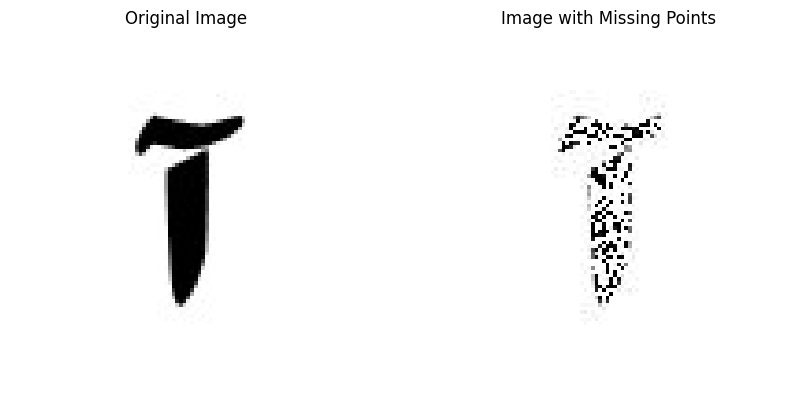

In [ ]:
from PIL import Image, ImageDraw
import random
import matplotlib.pyplot as plt

def generateImagesWithMissingPoints():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        output_path = f"/content/missing_points{i}.jpg"
        createImageWithMissingPoints(image_path, output_path)
        print(f"Image with missing points for {image_path} generated and saved as {output_path}")

    # Plot one of the images with missing points
    plotImageWithMissingPoints(image_paths[0], f"/content/missing_points1.jpg")

def createImageWithMissingPoints(input_path, output_path):
    """
    Create an image with random missing points and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the modified image.
    """
    # Open the input image
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels
    width, height = image.size

    # Define the number of points to remove (as a percentage of total pixels)
    missing_points_count = int(0.99 * width * height)  # Remove 5% of pixels

    for _ in range(missing_points_count):
        # Randomly select a pixel to remove
        x = random.randint(0, width - 1)
        y = random.randint(0, height - 1)

        # Set the pixel to white (255, 255, 255)
        draw.point((x, y), (255, 255, 255))

    # Save the modified image as a file
    image.save(output_path, "JPEG")

    # Clean up the drawing tool
    del draw

def plotImageWithMissingPoints(original_path, modified_path):
    """
    Plot the original and modified images side by side for comparison.

    Args:
        original_path (str): The file path to the original image.
        modified_path (str): The file path to the modified image.
    """
    original_image = Image.open(original_path)
    modified_image = Image.open(modified_path)

    # Plot the images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Image with Missing Points")
    plt.imshow(modified_image)
    plt.axis("off")

    plt.show()

# Generate images with missing points and plot one of them
generateImagesWithMissingPoints()


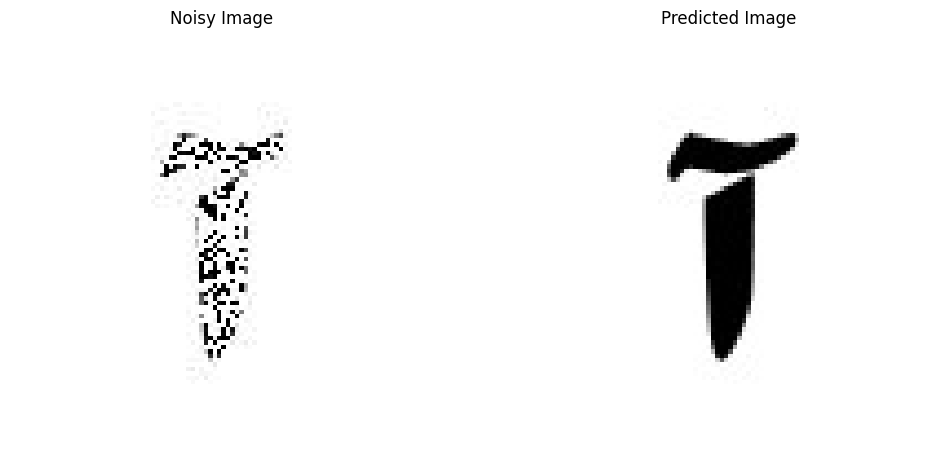

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def hamming_distance(image1, image2):
    """Calculate the Hamming distance between two binary images."""
    return np.sum(image1 != image2)

def hamming_neural_network(noisy_image, original_images):
    """Predict the original image from a noisy image using Hamming distance."""
    min_distance = float('inf')
    predicted_image = None

    for original in original_images:
        distance = hamming_distance(noisy_image.flatten(), original.flatten())  # Flatten for comparison
        if distance < min_distance:
            min_distance = distance
            predicted_image = original

    return predicted_image

def plot_images(noisy_image, predicted_image):
    """Plot the noisy and predicted images side by side."""
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Noisy Image")
    plt.imshow(noisy_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Predicted Image")
    plt.imshow(predicted_image)
    plt.axis('off')

    plt.show()

# Step 1: Set paths for original images and generated noisy images
original_image_paths = [
    "/content/1.jpg",
    "/content/2.jpg",
    "/content/3.jpg",
    "/content/4.jpg",
    "/content/5.jpg"
]

# Assuming noisy images have been saved as follows
noisy_image_paths = [
    "/content/missing_points1.jpg",
    "/content/missing_points2.jpg",
    "/content/missing_points3.jpg",
    "/content/missing_points4.jpg",
    "/content/missing_points5.jpg"
]

# Load original images for prediction
original_images = [np.array(Image.open(path).convert('RGB')) for path in original_image_paths]

# Load noisy images for testing
noisy_images = [np.array(Image.open(path).convert('RGB')) for path in noisy_image_paths]

# Step 2: Use the first noisy image for prediction
noisy_image = noisy_images[0]
predicted_image = hamming_neural_network(noisy_image, original_images)

# Step 3: Plot the noisy image and its predicted original image
plot_images(noisy_image, predicted_image)

question 4

In [ ]:
!gdown 1aUdKOMxyfJZxaig4TiYiAWn423V0lipd
data = pd.read_csv('cal_housing.csv')
data

Downloading...
From: https://drive.google.com/uc?id=1aUdKOMxyfJZxaig4TiYiAWn423V0lipd
To: /content/cal_housing.csv
100% 1.01M/1.01M [00:00<00:00, 46.8MB/s]


,longitude: continuous.,latitude: continuous.,housingMedianAge: continuous.,totalRooms: continuous.,totalBedrooms: continuous.,population: continuous.,households: continuous.,medianIncome: continuous.,medianHouseValue: continuous.
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700


In [ ]:
data.iloc[0]

,0
longitude: continuous.,-122.2300
latitude: continuous.,37.8800
housingMedianAge: continuous.,41.0000
totalRooms: continuous.,880.0000
totalBedrooms: continuous.,129.0000
population: continuous.,322.0000
households: continuous.,126.0000
medianIncome: continuous.,8.3252
medianHouseValue: continuous.,452600.0000


Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9171 - val_loss: 0.7255
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6955 - val_loss: 0.6089
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5784 - val_loss: 0.4984
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4895 - val_loss: 0.4237
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4090 - val_loss: 0.3816
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3769 - val_loss: 0.3631
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3440 - val_loss: 0.3503
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3377 - val_loss: 0.3409
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3313 - val_loss: 0.3361
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3228 - val_loss: 0.3319
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3157 - val_loss: 0.3281
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━

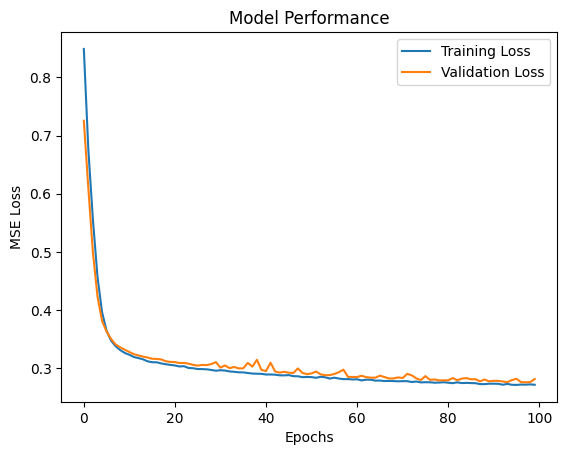

In [ ]:
# Assuming 'data' is your DataFrame
# Dropping the last column and assigning to y
y = data.iloc[:, -1]

# Assigning all remaining columns to x
x = data.iloc[:, :-1]
# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Step 2: Define the RBF Layer
class RBFLayer(layers.Layer):
    def __init__(self, units, gamma):
        super(RBFLayer, self).__init__()
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(
            shape=(self.units, input_shape[-1]),
            initializer="random_normal",
            trainable=True,
        )
        self.betas = self.add_weight(
            shape=(self.units,),
            initializer="ones",
            trainable=True,
        )

    def call(self, inputs):
        diff = tf.expand_dims(inputs, axis=1) - self.centers
        l2 = tf.reduce_sum(tf.square(diff), axis=-1)
        return tf.exp(-self.gamma * l2 * self.betas)

# Step 3: Build the Neural Network
input_dim = X_train.shape[1]
gamma = 0.5

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    RBFLayer(units=32, gamma=gamma),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="mse")

# Step 4: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Step 5: Plot performance metrics
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Model Performance')
plt.show()


Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6678 - val_loss: 0.3828
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3686 - val_loss: 0.3417
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3332 - val_loss: 0.3256
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3036 - val_loss: 0.3055
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2983 - val_loss: 0.2961
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2836 - val_loss: 0.2860
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2749 - val_loss: 0.2821
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2810 - val_loss: 0.2789
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2626 - val_loss: 0.2739
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2678 - val_loss: 0.2707
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2677 - val_loss: 0.2706
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━

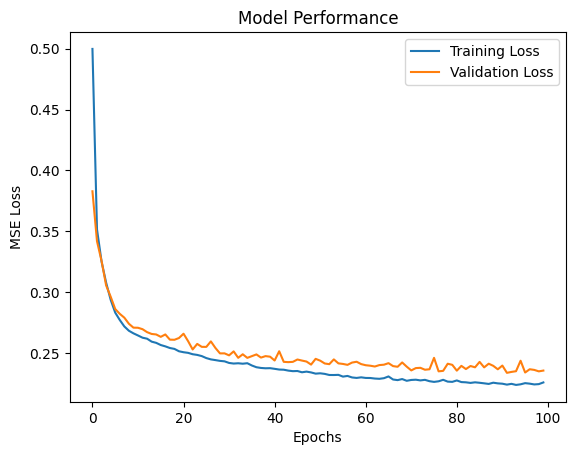

In [ ]:
# Define the model with Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use the Input layer
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="mse")

# Step 4: Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Step 5: Plot performance metrics
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Model Performance')
plt.show()